In [23]:
library(data.table)
library(dplyr)
library(irlba)

In [24]:
prep_chr = function(path){
    data = fread(path, data.table = F)
    rownames(data) = data$ID
    data[,c("#CHROM", "POS", "ID", "REF", "ALT", "QUAL", "FILTER", "INFO", "FORMAT")] = NULL
    data[data == "0|0"] = 0
    data[data == "0|1"] = 1
    data[data == "1|1"] = 2
    data[data == "1|0"] = 1
    return(data)
}


datalist = list()

for (chr in c(1)){
    message(chr)
    path = paste0("1kg_chr", chr, ".vcf")
    datalist[[chr]] = prep_chr(path)
}

1



In [ ]:
# message("combining chrs...")
# data = data.matrix(data.frame(rbindlist(datalist)))

# message(Sys.time())
# message("reducing dims...")
# red.data = prcomp(data, scale = T, center = T)
# message(Sys.time())

# pcs = data.frame(red.data$rotation)
# plot(pcs$PC1, pcs$PC2)

combining chrs...

2020-11-03 14:25:53

reducing dims...



In [25]:
library(Matrix)
data = t(data.matrix(data.frame(rbindlist(datalist))))
data = Matrix(data, sparse = T)
cm = colMeans(data)
p = irlba(data, nv=3, nu=3, tol=0.1, center=cm)

pcs = as.data.frame(p$u)
colnames(pcs) = c("PC1", "PC2", "PC3")

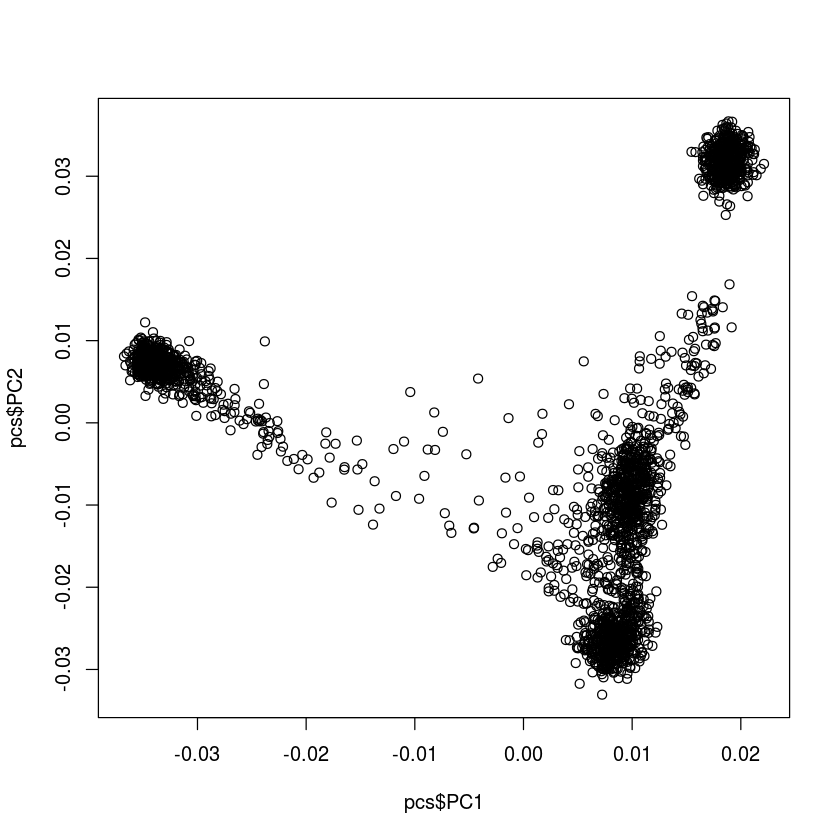

In [26]:
plot(pcs$PC1, pcs$PC2)

In [31]:
rownames(pcs) = rownames(data)

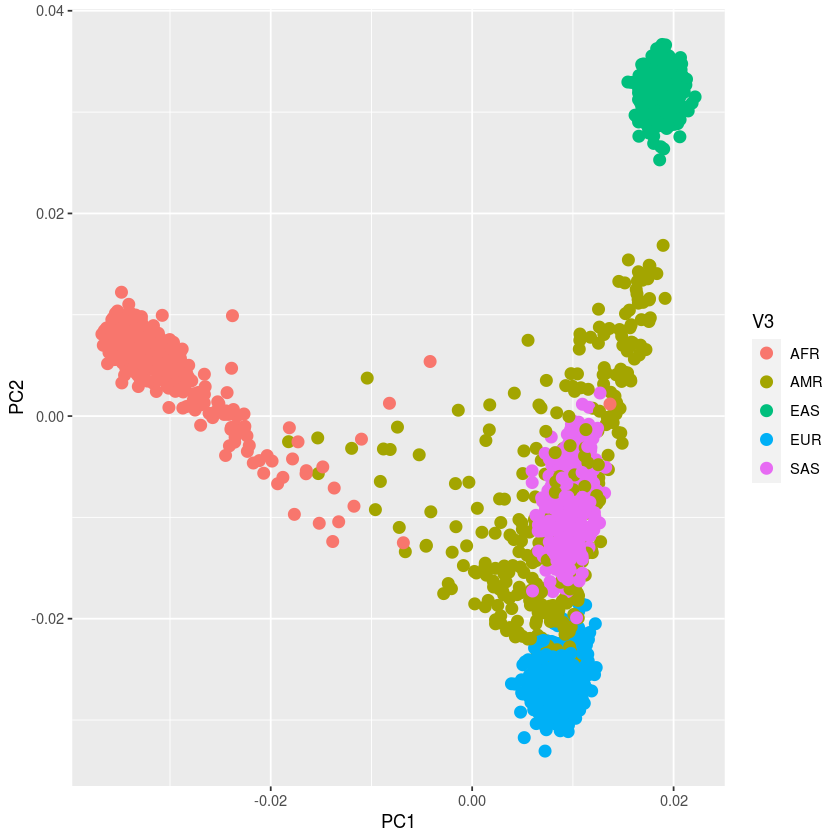

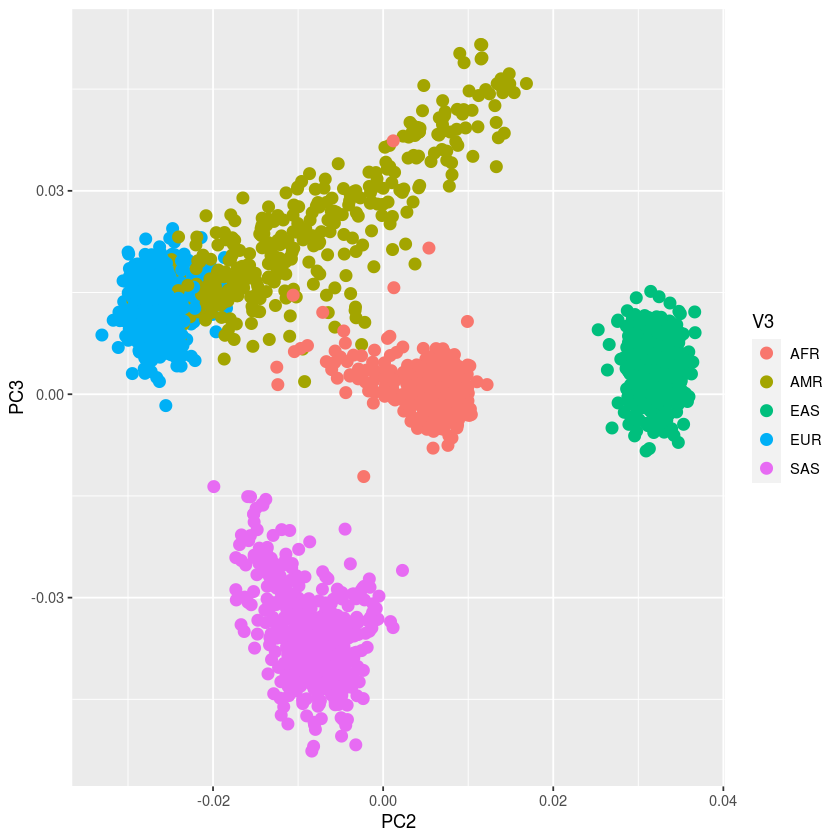

In [54]:
pops = fread("/projects/PPC/analysis/pancreatic_eqtls/analysis/pca/within.txt", data.table = F, header = F)
rownames(pops) = pops$V1
pops = merge(pcs, pops[,c("V1", "V3")], by = 0)

library(ggplot2)

ggplot(pops, aes(x = PC1, y = PC2, color = V3)) + geom_point(size = 3)

ggplot(pops, aes(x = PC2, y = PC3, color = V3)) + geom_point(size = 3)
